# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [2]:
import requests
import pandas as pd 
from bs4 import BeautifulSoup
import sqlite3

url= "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data=requests.get(url).text

In [3]:
print(html_data)
result= BeautifulSoup(html_data,"html.parser")
print(result)
tables = result.find_all("table")
print(tables)
for index,table in enumerate(tables):
    if "Tesla Quarterly Revenue" in str(table):
        my_index=index

print(my_index)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [4]:
df = pd.DataFrame(columns=['date','revenue'])
for row in tables[my_index].tbody.find_all('tr'):
    col = row.find_all('td')
    if col != "":
        fecha = col[0].text
        ingreso = col[1].text.replace("$","").replace(",","")
        df = df.append({"date":fecha, "revenue":ingreso}, ignore_index=True)
        # Probar con una lista

print(df)

/tmp/ipykernel_1241/3383221088.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"date":fecha, "revenue":ingreso}, ignore_index=True)
/tmp/ipykernel_1241/3383221088.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"date":fecha, "revenue":ingreso}, ignore_index=True)
/tmp/ipykernel_1241/3383221088.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"date":fecha, "revenue":ingreso}, ignore_index=True)
/tmp/ipykernel_1241/3383221088.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"date":fecha, "revenue":ingreso}, ignore_index=True)
/tmp/ipykernel_1241/3383221088.py:7:

          date revenue
0   2022-03-31   18756
1   2021-12-31   17719
2   2021-09-30   13757
3   2021-06-30   11958
4   2021-03-31   10389
5   2020-12-31   10744
6   2020-09-30    8771
7   2020-06-30    6036
8   2020-03-31    5985
9   2019-12-31    7384
10  2019-09-30    6303
11  2019-06-30    6350
12  2019-03-31    4541
13  2018-12-31    7226
14  2018-09-30    6824
15  2018-06-30    4002
16  2018-03-31    3409
17  2017-12-31    3288
18  2017-09-30    2985
19  2017-06-30    2790
20  2017-03-31    2696
21  2016-12-31    2285
22  2016-09-30    2298
23  2016-06-30    1270
24  2016-03-31    1147
25  2015-12-31    1214
26  2015-09-30     937
27  2015-06-30     955
28  2015-03-31     940
29  2014-12-31     957
30  2014-09-30     852
31  2014-06-30     769
32  2014-03-31     621
33  2013-12-31     615
34  2013-09-30     431
35  2013-06-30     405
36  2013-03-31     562
37  2012-12-31     306
38  2012-09-30      50
39  2012-06-30      27
40  2012-03-31      30
41  2011-12-31      39
42  2011-09

/tmp/ipykernel_1241/3383221088.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"date":fecha, "revenue":ingreso}, ignore_index=True)
/tmp/ipykernel_1241/3383221088.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"date":fecha, "revenue":ingreso}, ignore_index=True)
/tmp/ipykernel_1241/3383221088.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"date":fecha, "revenue":ingreso}, ignore_index=True)
/tmp/ipykernel_1241/3383221088.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"date":fecha, "revenue":ingreso}, ignore_index=True)
/tmp/ipykernel_1241/3383221088.py:7:

In [5]:
df = df[df['revenue']!=""]
print(df)

# Fijarse el tipo de dato que tiene el df
print(type(df))

          date revenue
0   2022-03-31   18756
1   2021-12-31   17719
2   2021-09-30   13757
3   2021-06-30   11958
4   2021-03-31   10389
5   2020-12-31   10744
6   2020-09-30    8771
7   2020-06-30    6036
8   2020-03-31    5985
9   2019-12-31    7384
10  2019-09-30    6303
11  2019-06-30    6350
12  2019-03-31    4541
13  2018-12-31    7226
14  2018-09-30    6824
15  2018-06-30    4002
16  2018-03-31    3409
17  2017-12-31    3288
18  2017-09-30    2985
19  2017-06-30    2790
20  2017-03-31    2696
21  2016-12-31    2285
22  2016-09-30    2298
23  2016-06-30    1270
24  2016-03-31    1147
25  2015-12-31    1214
26  2015-09-30     937
27  2015-06-30     955
28  2015-03-31     940
29  2014-12-31     957
30  2014-09-30     852
31  2014-06-30     769
32  2014-03-31     621
33  2013-12-31     615
34  2013-09-30     431
35  2013-06-30     405
36  2013-03-31     562
37  2012-12-31     306
38  2012-09-30      50
39  2012-06-30      27
40  2012-03-31      30
41  2011-12-31      39
42  2011-09

In [6]:
#Insertar los datos en un sqlite3 para eso convertimos el df en una lista de tuplas
registros = df.to_records(index=False)
lista_tuplas = list(registros)
print(lista_tuplas)

[('2022-03-31', '18756'), ('2021-12-31', '17719'), ('2021-09-30', '13757'), ('2021-06-30', '11958'), ('2021-03-31', '10389'), ('2020-12-31', '10744'), ('2020-09-30', '8771'), ('2020-06-30', '6036'), ('2020-03-31', '5985'), ('2019-12-31', '7384'), ('2019-09-30', '6303'), ('2019-06-30', '6350'), ('2019-03-31', '4541'), ('2018-12-31', '7226'), ('2018-09-30', '6824'), ('2018-06-30', '4002'), ('2018-03-31', '3409'), ('2017-12-31', '3288'), ('2017-09-30', '2985'), ('2017-06-30', '2790'), ('2017-03-31', '2696'), ('2016-12-31', '2285'), ('2016-09-30', '2298'), ('2016-06-30', '1270'), ('2016-03-31', '1147'), ('2015-12-31', '1214'), ('2015-09-30', '937'), ('2015-06-30', '955'), ('2015-03-31', '940'), ('2014-12-31', '957'), ('2014-09-30', '852'), ('2014-06-30', '769'), ('2014-03-31', '621'), ('2013-12-31', '615'), ('2013-09-30', '431'), ('2013-06-30', '405'), ('2013-03-31', '562'), ('2012-12-31', '306'), ('2012-09-30', '50'), ('2012-06-30', '27'), ('2012-03-31', '30'), ('2011-12-31', '39'), ('201

In [7]:
#Usar la funcion connect() de sqlite3 para crear la base de datos.

conectar = sqlite3.connect('Datos_2.db')

con = conectar.cursor()

con.execute(""" CREATE TABLE revenue (Fecha,Revenue) """)


con.executemany('INSERT INTO revenue VALUES(?,?)', lista_tuplas)

conectar.commit()

for fila in con.execute('SELECT * FROM revenue'):
    print(fila)


('2022-03-31', '18756')
('2021-12-31', '17719')
('2021-09-30', '13757')
('2021-06-30', '11958')
('2021-03-31', '10389')
('2020-12-31', '10744')
('2020-09-30', '8771')
('2020-06-30', '6036')
('2020-03-31', '5985')
('2019-12-31', '7384')
('2019-09-30', '6303')
('2019-06-30', '6350')
('2019-03-31', '4541')
('2018-12-31', '7226')
('2018-09-30', '6824')
('2018-06-30', '4002')
('2018-03-31', '3409')
('2017-12-31', '3288')
('2017-09-30', '2985')
('2017-06-30', '2790')
('2017-03-31', '2696')
('2016-12-31', '2285')
('2016-09-30', '2298')
('2016-06-30', '1270')
('2016-03-31', '1147')
('2015-12-31', '1214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-30', '769')
('2014-03-31', '621')
('2013-12-31', '615')
('2013-09-30', '431')
('2013-06-30', '405')
('2013-03-31', '562')
('2012-12-31', '306')
('2012-09-30', '50')
('2012-06-30', '27')
('2012-03-31', '30')
('2011-12-31', '39')
('2011-09-30', '58')
('2011-06-30', '58')
('2011

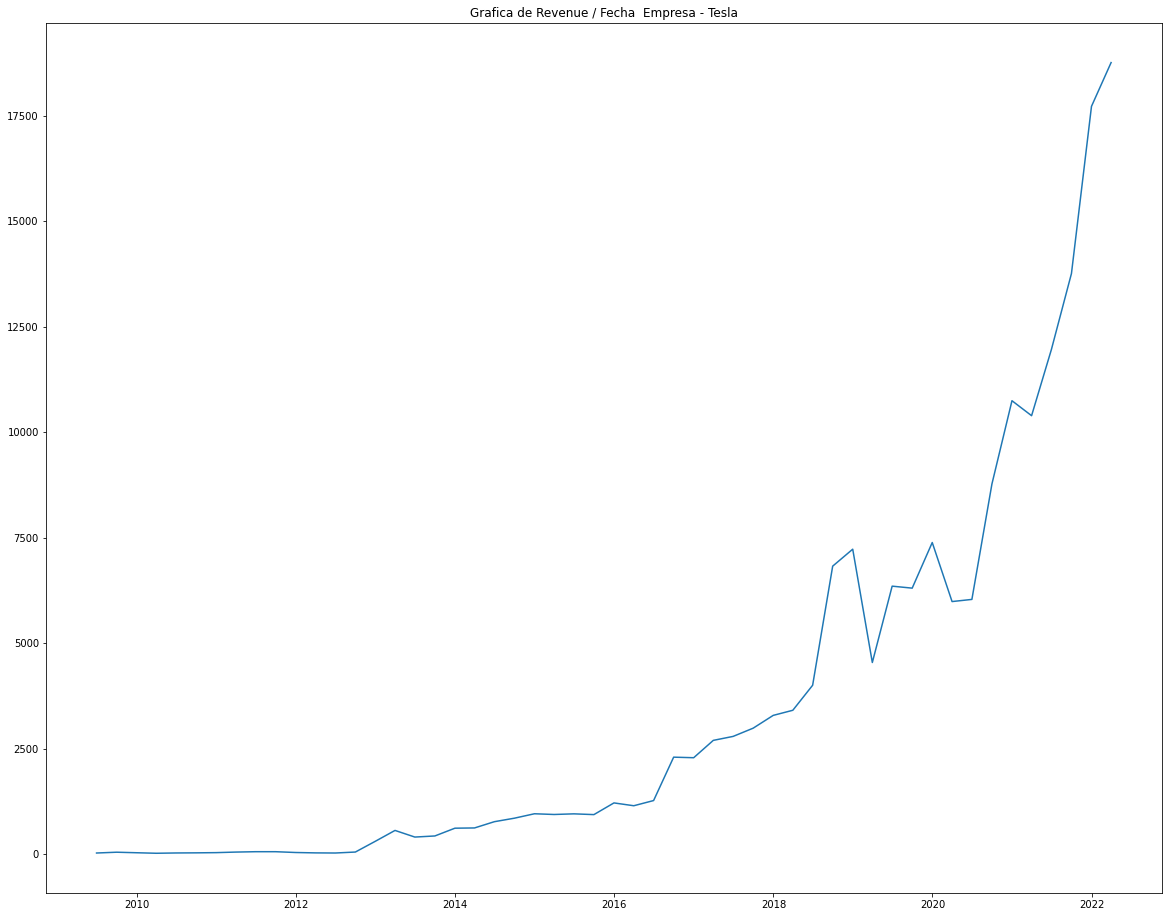

In [39]:
import matplotlib.pyplot as plt 

sql = 'SELECT * FROM revenue'
plt.figure(figsize=(20,16))
data = pd.read_sql(sql, conectar)
df_data = pd.DataFrame(data)
#print(df_data)
df_data['Revenue']=df_data['Revenue'].astype(int)
df_data['Fecha']=pd.to_datetime(df_data['Fecha'], format='%Y-%m-%d')
xpoints=df_data['Fecha']
ypoints=df_data['Revenue']
plt.plot(xpoints,ypoints)

plt.title("Grafica de Revenue / Fecha  Empresa - Tesla")
plt.show()
